Ridge regression, also known as Tikhonov regularization, is a technique used in linear regression to address the problem of multicollinearity among predictor variables. Multicollinearity occurs when independent variables in a regression model are highly correlated, which can lead to unreliable and unstable estimates of regression coefficients.

Ridge regression mitigates this issue by adding a regularization term to the ordinary least squares (OLS) objective function, which penalizes large coefficients and thus reduces their variance.

### ISSUE

For example, if two features are highly correlated, the model might give each one a very large positive and negative coefficient, though their effects cancel each other out in practice. This magnification of coefficients results in high variance in predictions, which performs poorly on unseen data.

In the test data, even slight differences in the correlation between features (due to noise or sampling variations) can lead to large swings in the predicted values. This is what we mean by the model having high variance.

#### SOLUTION

Ridge regression introduces a regularization term to the objective function. Instead of just minimizing the sum of squared errors, we also minimize the sum of the squared coefficients (shrinkage). Mathematically, the cost function for ridge regression becomes:

Cost function = Sum of squared errors + 𝜆∑𝛽𝑗**2

​
Where:  
λ is the regularization parameter (also called the tuning parameter).  
𝛽𝑗 are the coefficients of the model.

#### INTUITION BEHIND REG TERM


The term 𝜆∑𝛽𝑗 penalizes large values of the coefficients.  
The larger λ is, the more it shrinks the coefficients toward zero.  
This discourages the model from assigning excessive weight to any individual feature, especially in cases where features are highly correlated.  
The result is a model with smaller, more stable coefficients, which is less sensitive to small changes in the data, thus reducing overfitting.

* When 𝜆=0 0ridge regression is equivalent to ordinary least squares (OLS).

* When 
λ is large, all coefficients shrink closer to zero, making the model simpler, but potentially underfitting the data.
 * The optimal value of 
𝜆
λ is often chosen through cross-validation, as it balances the bias and variance trade-of

Bias-Variance Trade-off: By shrinking the coefficients, ridge regression introduces some bias (the model is constrained to not perfectly fit the data), but it reduces variance (the model is more stable and generalizes better to new data). So, ridge regression is particularly useful when we want to trade off a little bias for a significant reduction in variance.

In [1]:
# Importing libraries 
  
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
 

In [2]:
 
# Ridge Regression 
  
class RidgeRegression() : 
      
    def __init__( self, learning_rate, iterations, l2_penality ) : 
          
        self.learning_rate = learning_rate         
        self.iterations = iterations         
        self.l2_penality = l2_penality 
          
    # Function for model training             
    def fit( self, X, Y ) : 
          
        # no_of_training_examples, no_of_features         
        self.m, self.n = X.shape 
          
        # weight initialization         
        self.W = np.zeros( self.n ) 
          
        self.b = 0        
        self.X = X         
        self.Y = Y 
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) :            
        Y_pred = self.predict( self.X ) 
          
        # calculate gradients       
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m      
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db         
        return self
      
    # Hypothetical function  h( x )  
    def predict( self, X ) :     
        return X.dot( self.W ) + self.b 
 

Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731 122391  57081]
Trained W         9325.76
Trained b         26842.8


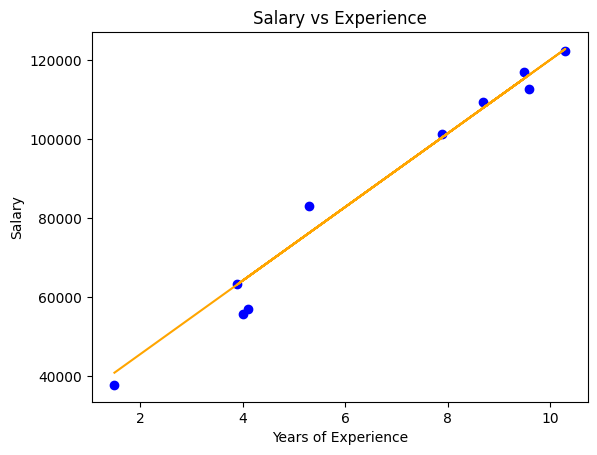

In [5]:
def main() : 
      
    # Importing dataset     
    df = pd.read_csv( "salary_data.csv" ) 
    X = df.iloc[:, :-1].values 
    Y = df.iloc[:, 1].values     
  
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y,  
                                            
                                          test_size = 1 / 3, random_state = 0 ) 
      
    # Model training     
    model = RidgeRegression( iterations = 1000,                              
                            learning_rate = 0.01, l2_penality = 1 ) 
    model.fit( X_train, Y_train ) 
      
    # Prediction on test set 
    Y_pred = model.predict( X_test )     
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )      
    print( "Real values      ", Y_test[:3] )     
    print( "Trained W        ", round( model.W[0], 2 ) )     
    print( "Trained b        ", round( model.b, 2 ) ) 
      
    # Visualization on test set      
    plt.scatter( X_test, Y_test, color = 'blue' )     
    plt.plot( X_test, Y_pred, color = 'orange' )     
    plt.title( 'Salary vs Experience' )     
    plt.xlabel( 'Years of Experience' )     
    plt.ylabel( 'Salary' )     
    plt.show() 
      
if __name__ == "__main__" :  
    main() 